In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.preprocessing import image
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

In [3]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
df = pd.read_csv('fer2013.csv')
im = df['pixels']
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [4]:
def getData(filename):
    #imagesize = 48x48
    Y = []
    X = []
    first = True
    for line in open(filename):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X) / 255.0, np.array(Y)
    return X,Y

In [5]:
X, Y = getData('fer2013.csv')
num_class = len(set(Y))
print('No. of classes are ',num_class)

No. of classes are  7


In [6]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [9]:
def simple_conv():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64,(3,3), input_shape = input_shape, activation='relu', padding= 'same'))
    model.add(Conv2D(64,(3,3),  activation='relu', padding= 'same')) 
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),  activation='relu', padding= 'same'))
    model.add(Conv2D(128,(3,3),  activation='relu', padding= 'same')) 
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),  activation='relu', padding= 'same'))
    model.add(Conv2D(64,(3,3),  activation='relu', padding= 'same')) 
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(7))
    model.add(Activation('softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

simple_model = simple_conv()
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)       

In [11]:
path_model='Models/proto/simple_conv.h5' 
simple_model_history = simple_model.fit(x=X_train,     
            y=y_train, 
            batch_size=32, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
1010/1010 [==============================] - 19s 13ms/step - loss: 1.8111 - accuracy: 0.2486 - val_loss: 1.7832 - val_accuracy: 0.2630
Epoch 2/20
1010/1010 [==============================] - 13s 13ms/step - loss: 1.6124 - accuracy: 0.3591 - val_loss: 1.4373 - val_accuracy: 0.4408
Epoch 3/20
1010/1010 [==============================] - 13s 13ms/step - loss: 1.3855 - accuracy: 0.4651 - val_loss: 1.2902 - val_accuracy: 0.4999
Epoch 4/20
1010/1010 [==============================] - 13s 13ms/step - loss: 1.2538 - accuracy: 0.5180 - val_loss: 1.2321 - val_accuracy: 0.5263
Epoch 5/20
1010/1010 [==============================] - 13s 13ms/step - loss: 1.1564 - accuracy: 0.5584 - val_loss: 1.1790 - val_accuracy: 0.5472
Epoch 6/20
1010/1010 [==============================] - 12s 12ms/step - loss: 1.0760 - accuracy: 0.5924 - val_loss: 1.1676 - val_accuracy: 0.5667
Epoch 7/20
1010/1010 [==============================] - 11s 11ms/step - loss: 0.9972 - accuracy: 0.6234 - val_loss: 1.2122 -

In [12]:
def plot_graph(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' +metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

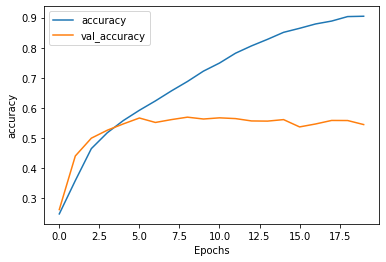

In [15]:
%matplotlib inline
plot_graph(simple_model_history,'accuracy')

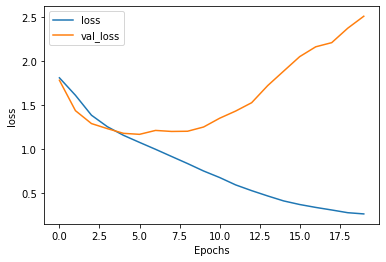

In [16]:
plot_graph(simple_model_history,'loss')

In [17]:
def norm_conv():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64,(3,3), input_shape = input_shape, activation='relu', padding= 'same'))
    model.add(Conv2D(64,(3,3),  activation='relu', padding= 'same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),  activation='relu', padding= 'same'))
    model.add(Conv2D(128,(3,3),  activation='relu', padding= 'same'))
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),  activation='relu', padding= 'same'))
    model.add(Conv2D(64,(3,3),  activation='relu', padding= 'same'))
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(7))
    model.add(Activation('softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

norm_model = norm_conv()
norm_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)      

In [18]:
path_model='Models/proto/norm_conv.h5' 
norm_model_history = norm_model.fit(x=X_train,     
            y=y_train, 
            batch_size=32, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
1010/1010 [==============================] - 19s 18ms/step - loss: 1.5620 - accuracy: 0.3901 - val_loss: 1.5363 - val_accuracy: 0.4213
Epoch 2/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.2373 - accuracy: 0.5291 - val_loss: 1.2161 - val_accuracy: 0.5378
Epoch 3/20
1010/1010 [==============================] - 17s 16ms/step - loss: 1.0942 - accuracy: 0.5867 - val_loss: 1.1174 - val_accuracy: 0.5795
Epoch 4/20
1010/1010 [==============================] - 18s 18ms/step - loss: 0.9866 - accuracy: 0.6302 - val_loss: 1.1583 - val_accuracy: 0.5659
Epoch 5/20
1010/1010 [==============================] - 18s 18ms/step - loss: 0.8791 - accuracy: 0.6722 - val_loss: 1.1209 - val_accuracy: 0.5804
Epoch 6/20
1010/1010 [==============================] - 18s 18ms/step - loss: 0.7641 - accuracy: 0.7164 - val_loss: 1.2038 - val_accuracy: 0.5745
Epoch 7/20
1010/1010 [==============================] - 18s 18ms/step - loss: 0.6563 - accuracy: 0.7591 - val_loss: 1.1617 -

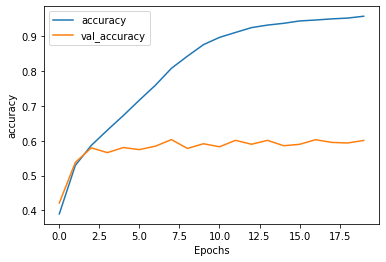

In [19]:
plot_graph(norm_model_history,'accuracy')

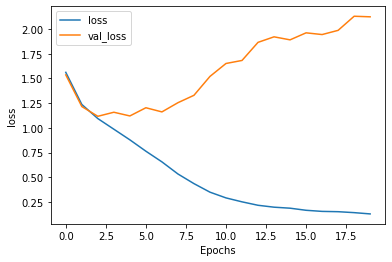

In [20]:
plot_graph(norm_model_history,'loss')
